# 🛍️ E-Commerce Sales EDA – Amazon Dataset

This notebook explores a cleaned dataset of Amazon sales to identify trends, key metrics, and business insights.  
We will analyze sales volume, revenue patterns, product performance, and customer behavior over time.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv(r"C:\Users\sypho\portfolio\PROJETS\ecom\ecommerce-sales-analysis\data\Amazon_Sale_Report_Cleaned.csv")

In [7]:
df.to_csv("Amazon_Sale_Report_Cleaned.csv", index=False, encoding='utf-8', sep=',')

In [29]:
# Quick check
df.head()

,Date,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount (IDR),ship-city,ship-state,ship-postal-code,B2B
0,2022-03-31,171-5621960-3341131,Shipped,Amazon,Amazon.in,Expedited,JNE3518,JNE3518-KR-L,kurta,L,B08XVQM1LP,1,487.0,chennai,TAMIL NADU,600035,False
1,2022-03-31,406-5696940-6341966,Shipped,Amazon,Amazon.in,Expedited,SET291,SET291-KR-PP-XL,Set,XL,B099NJV9X7,1,605.0,HOWRAH,WEST BENGAL,711102,False
2,2022-03-31,407-4837648-6290749,Shipped,Amazon,Amazon.in,Expedited,SET341,SET341-KR-NP-XL,Set,XL,B09NPX3HG3,1,857.0,KADI,Gujarat,382715,False
3,2022-03-31,402-4733027-0669159,Shipped,Amazon,Amazon.in,Expedited,J0335,J0335-DR-XL,Western Dress,XL,B09831P2JC,1,989.0,BENGALURU,KARNATAKA,560037,False
4,2022-03-31,171-7254125-8884332,Cancelled,Amazon,Amazon.in,Expedited,JNE3784,JNE3784-KR-XXL,kurta,XXL,B09K3XZC3J,0,0.0,JAIPUR,RAJASTHAN,302029,False


In [25]:
df.describe(include="all")

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount (IDR),ship-city,ship-state,ship-postal-code,B2B
count,128713,128713,128713,128713,128713,128713,128713,128713,128713,128713,128713,128713.000000,128713.000000,128713,128713,128713.000000,128713
unique,120227,91,12,2,2,2,1376,7185,9,11,7181,NaN,NaN,8955,69,NaN,2
top,403-4984515-8861958,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,NaN,NaN,BENGALURU,MAHARASHTRA,NaN,False
freq,12,2084,77580,89460,128712,88500,4223,773,50168,22667,773,NaN,NaN,11215,22237,NaN,127843
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860830,556.717294,NaN,NaN,464046.942648,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357172,346.762477,NaN,NaN,191559.157657,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,110001.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,376.000000,NaN,NaN,382421.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,545.000000,NaN,NaN,500034.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,761.000000,NaN,NaN,600026.000000,NaN


## Sales Over Time

C:\Users\sypho\AppData\Local\Temp\ipykernel_15708\3293672220.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['Amount (IDR)'].resample('M').sum()
C:\Users\sypho\AppData\Local\Temp\ipykernel_15708\3293672220.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total_qty = df['Qty'].resample('M').sum()


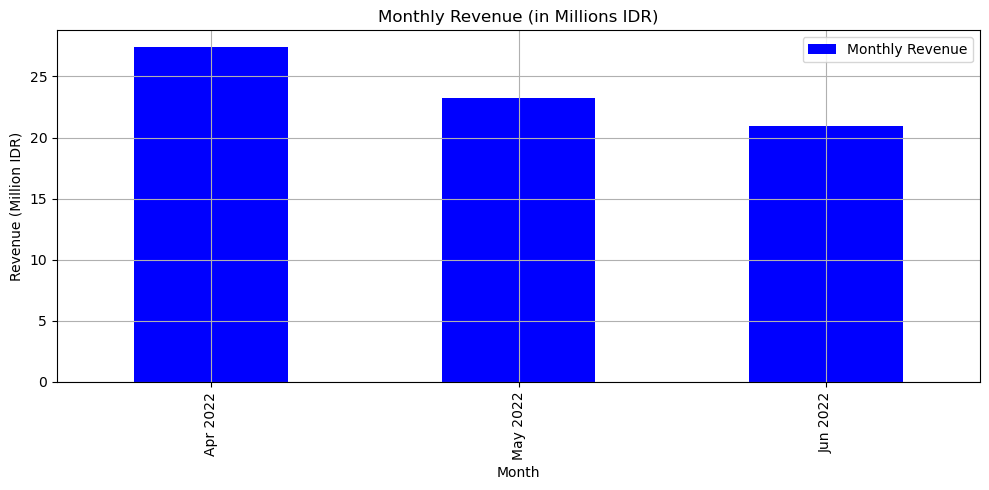

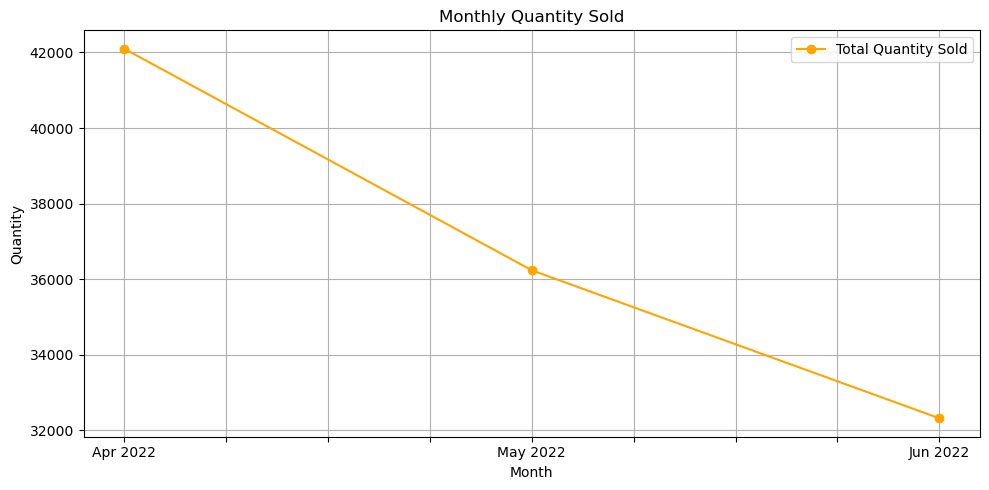

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Monthly totals
monthly_revenue = df['Amount (IDR)'].resample('M').sum()
monthly_total_qty = df['Qty'].resample('M').sum()

# Remove March (optional if incomplete)
monthly_revenue = monthly_revenue[monthly_revenue.index.month != 3]
monthly_total_qty = monthly_total_qty[monthly_total_qty.index.month != 3]

# Format for readability
monthly_revenue.index = monthly_revenue.index.strftime('%b %Y')
monthly_total_qty.index = monthly_total_qty.index.strftime('%b %Y')
monthly_revenue_million = monthly_revenue / 1_000_000

# Plot Revenue
plt.figure(figsize=(10, 5))
monthly_revenue_million.plot(kind='bar', color='blue', label='Monthly Revenue')
plt.title("Monthly Revenue (in Millions IDR)")
plt.ylabel("Revenue (Million IDR)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Quantity
plt.figure(figsize=(10, 5))
monthly_total_qty.plot(marker='o', color='orange', label='Total Quantity Sold')
plt.title("Monthly Quantity Sold")
plt.ylabel("Quantity")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)


In [37]:
# Reset Index if error
df.reset_index(inplace=True)

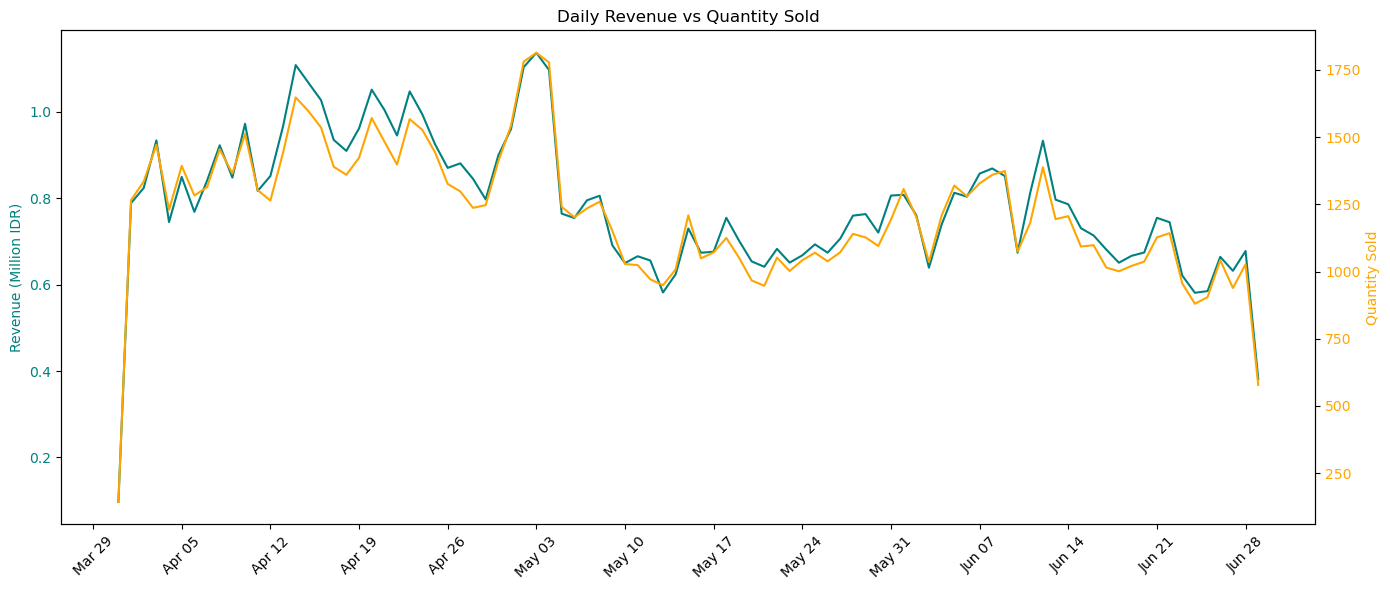

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample daily totals
daily_revenue = df['Amount (IDR)'].resample('D').sum() / 1_000_000  # Convert to millions
daily_qty = df['Qty'].resample('D').sum()

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot revenue
ax1.plot(daily_revenue, color='teal', label='Revenue')
ax1.set_ylabel("Revenue (Million IDR)", color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Format x-axis dates
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45)

# Plot quantity on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(daily_qty, color='orange', label='Quantity Sold')
ax2.set_ylabel("Quantity Sold", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Final layout
plt.title("Daily Revenue vs Quantity Sold")
plt.tight_layout()
plt.show()

# Reset index for further work
df.reset_index(inplace=True)

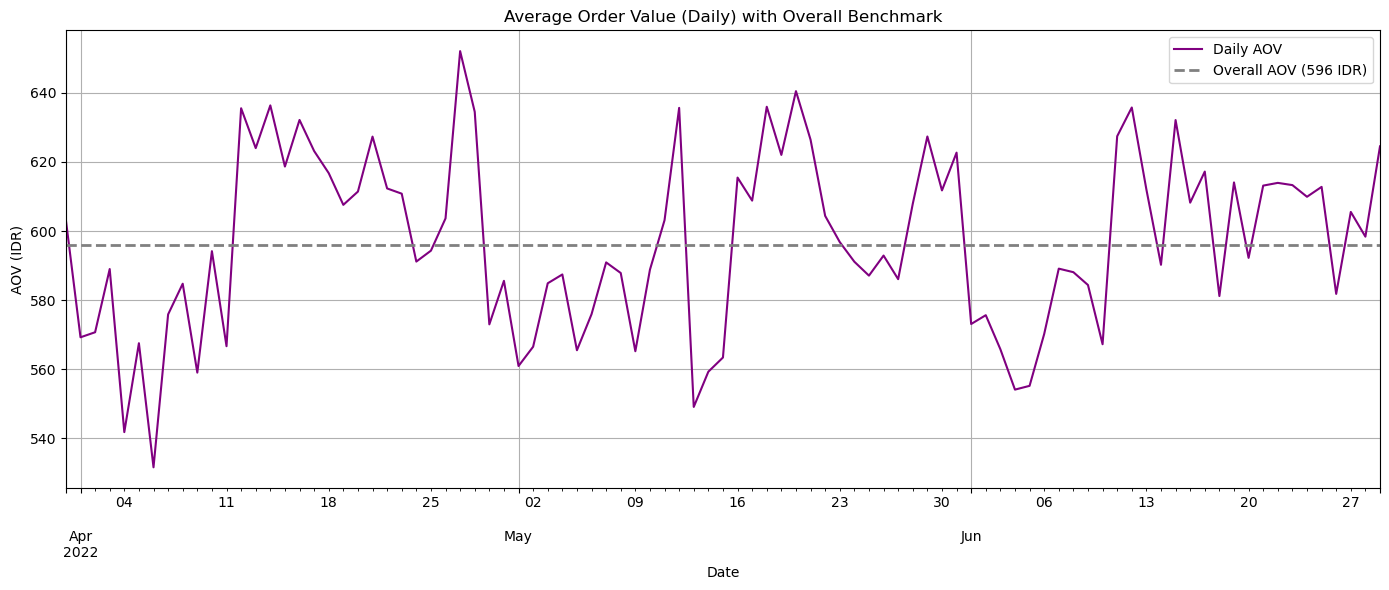

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group by day: total revenue and unique orders
daily_stats = df.resample('D').agg({
    'Amount (IDR)': 'sum',
    'Order ID': 'nunique'
})

# Compute AOV (average order value) in IDR
daily_stats['AOV'] = daily_stats['Amount (IDR)'] / daily_stats['Order ID']

# Calculate overall AOV for the entire dataset
total_revenue = df['Amount (IDR)'].sum()
total_orders = df['Order ID'].nunique()
overall_aov = total_revenue / total_orders

# Plot
plt.figure(figsize=(14, 6))
daily_stats['AOV'].plot(color='purple', label='Daily AOV')

# Add horizontal line for overall AOV
plt.axhline(overall_aov, color='gray', linestyle='--', linewidth=2, label=f'Overall AOV ({overall_aov:,.0f} IDR)')

# Title and labels
plt.title("Average Order Value (Daily) with Overall Benchmark")
plt.xlabel("Date")
plt.ylabel("AOV (IDR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Reset index if needed later
df.reset_index(inplace=True)

## Product Analysis

In [5]:
# Sum of quantity sold per category
qty_per_category = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Display the result
qty_per_category

Category
Set              42959
kurta            42705
Western Dress    13413
Top               9362
Ethnic Dress      1016
Blouse             812
Bottom             383
Saree              147
Dupatta              3
Name: Qty, dtype: int64

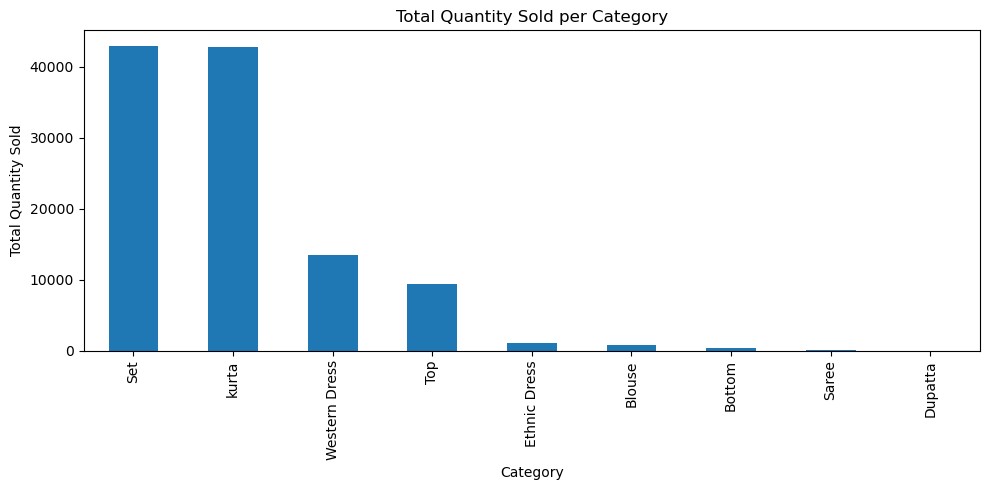

In [7]:
#CPloting Quantity per Category

qty_per_category.plot(kind='bar', figsize=(10, 5), title='Total Quantity Sold per Category')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

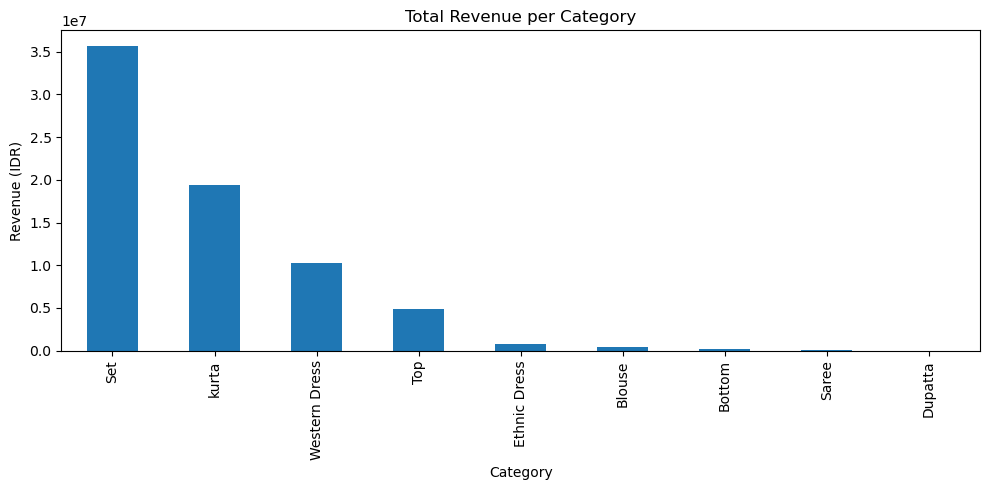

In [33]:
#Ploting revenue per category
revenue_per_category = df.groupby('Category')['Amount (IDR)'].sum().sort_values(ascending=False)
revenue_per_category.plot(kind='bar', figsize=(10, 5), title='Total Revenue per Category')
plt.ylabel("Revenue (IDR)")
plt.tight_layout()
plt.show()

## Order Status & Cancellation Rate

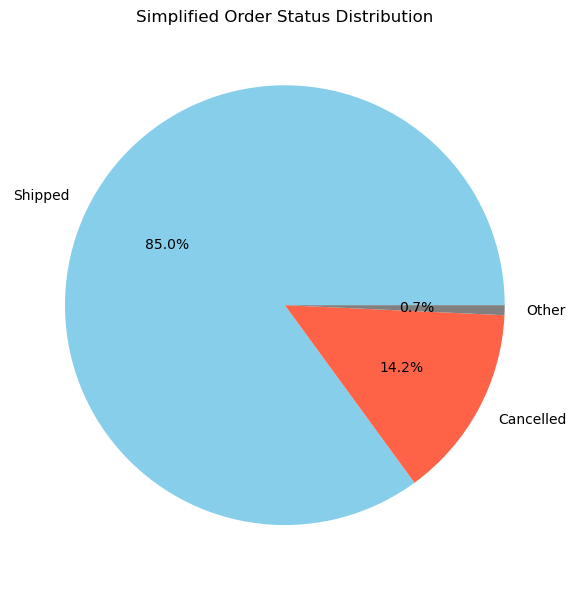

🛑 Cancellation Rate: 14.24%


In [31]:
import matplotlib.pyplot as plt

# Simplify status into broader categories
df['Status_Simplified'] = df['Status'].apply(lambda x: 'Shipped' 
    if 'Shipped' in x 
    else 'Cancelled' 
    if x == 'Cancelled' 
    else 'Other'
)

# Calculate distribution (as %)
status_dist = df['Status_Simplified'].value_counts(normalize=True) * 100

# Plot pie chart
status_dist.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    title='Simplified Order Status Distribution', 
    figsize=(6,6), 
    colors=['skyblue', 'tomato', 'gray']
)
plt.ylabel("")
plt.tight_layout()
plt.show()

# Print cancellation rate
cancel_rate = status_dist.get('Cancelled', 0)
print(f"🛑 Cancellation Rate: {cancel_rate:.2f}%")

## Geographic Insights


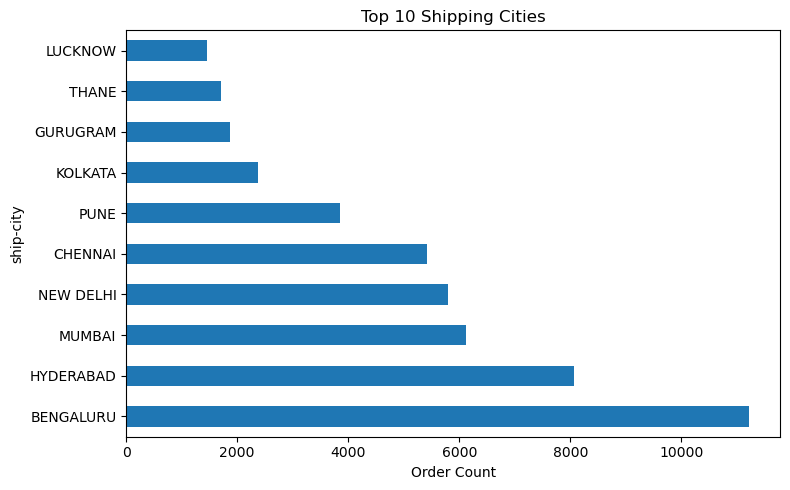

In [34]:
top_cities = df['ship-city'].value_counts().head(10)
top_cities.plot(kind='barh', figsize=(8,5), title='Top 10 Shipping Cities')
plt.xlabel("Order Count")
plt.tight_layout()
plt.show()